**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


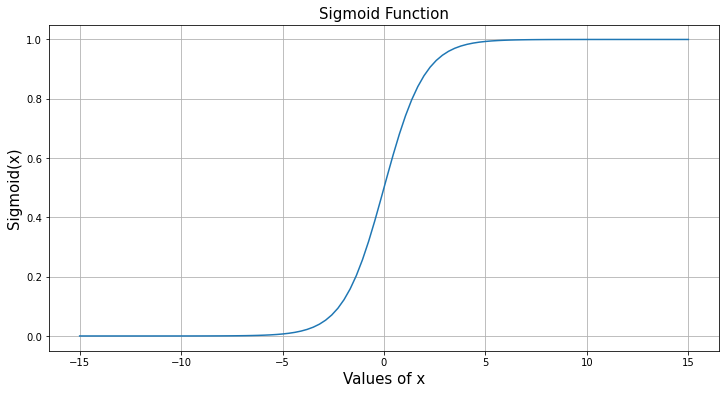

In [4]:
# Define the sigmoid function
def sigmoid_function(x):
    y = 1/(1 + np.exp(-x))
    return y

x = np.linspace(-15, 15, 100)
y = sigmoid_function(x)

plt.figure(figsize = (12, 6))
plt.plot(x, y)
plt.grid()
plt.xlabel('Values of x', fontsize = 15)
plt.ylabel('Sigmoid(x)', fontsize = 15)
plt.title('Sigmoid Function', fontsize = 15);

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [5]:
# Declaring the variables.
X = df[['PAY_1', 'LIMIT_BAL']]
y = df['default payment next month']

print(X)
print('\n', y)

       PAY_1  LIMIT_BAL
0          2      20000
1         -1     120000
2          0      90000
3          0      50000
4         -1      50000
...      ...        ...
26659      0     220000
26660     -1     150000
26661      4      30000
26662      1      80000
26663      0      50000

[26664 rows x 2 columns]

 0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64


In [6]:
# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [7]:
print('Shape of X_train data:', X_train.shape)
print('Shape of X_test data:', X_test.shape)
print('Shape of y_train data:', y_train.shape)
print('Shape of y_test data:', y_test.shape)

Shape of X_train data: (21331, 2)
Shape of X_test data: (5333, 2)
Shape of y_train data: (21331,)
Shape of y_test data: (5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [8]:
log_model = LogisticRegression(solver = 'liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [9]:
# Fit the logistic regression model on training data
log_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [10]:
# Make predictions using `.predict()`
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Find class probabilities using `.predict_proba()`
y_pred_proba = log_model.predict_proba(X_test)
y_pred_proba

array([[0.85596579, 0.14403421],
       [0.83822618, 0.16177382],
       [0.6337557 , 0.3662443 ],
       ...,
       [0.69477618, 0.30522382],
       [0.6337557 , 0.3662443 ],
       [0.88658879, 0.11341121]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [12]:
# Add column of 1s to features
x_1 = X_test.copy()
x_1['ONE'] = 1
x_1 = x_1[['LIMIT_BAL', 'PAY_1', 'ONE']]
x_1.head()

,LIMIT_BAL,PAY_1,ONE
13852,260000,0,1
16890,240000,-1,1
20188,80000,-2,1
13039,50000,0,1
20058,20000,0,1


In [13]:
x_1.shape

(5333, 3)

In [14]:
# Get coefficients and intercepts from trained model
log_model_coeff = log_model.coef_
log_model_intercept = log_model.intercept_

print('Coefficients of trained model', log_model_coeff)
print('Intercept of trained model', log_model_intercept)

Coefficients of trained model [[ 8.28035791e-11 -6.85453670e-06]]
Intercept of trained model [-6.62150781e-11]


In [15]:
# Manually calculate predicted probabilities
y_pred_proba1 = []

for i in range(len(x_1)):
    z = log_model_coeff[0][1]*x_1.iloc[i, 0] + log_model_coeff[0][0]*x_1.iloc[i,1] + log_model_intercept[0]*x_1.iloc[i,2]
    y_pred_proba1.append(sigmoid_function(z))

In [16]:
y_pred_proba1

[0.14403421324422616,
 0.16177381627131934,
 0.3662443035455177,
 0.41514724860970076,
 0.46578089213463186,
 0.41514724860970076,
 0.46578089213463186,
 0.22551412841863008,
 0.4657808921552358,
 0.07815859149152547,
 0.4151472486499102,
 0.20247329138443554,
 0.2024732914111774,
 0.16177381627131934,
 0.16177381627131934,
 0.4318808401031801,
 0.4151472486499102,
 0.12048814843485041,
 0.08862483713697214,
 0.46578089213463186,
 0.18123566783027542,
 0.31995055566124947,
 0.44877136967633374,
 0.41514724860970076,
 0.46578089213463186,
 0.39860711016191835,
 0.4657808921758398,
 0.41514724860970076,
 0.36624430358395665,
 0.20247329139780645,
 0.25035386973980833,
 0.14403421323401744,
 0.02753545724308899,
 0.29088498800529367,
 0.2634370030700102,
 0.2503538697553487,
 0.23771079322892869,
 0.1526929403560354,
 0.4657808921758398,
 0.11341121271752605,
 0.26343700308607726,
 0.08324227918252448,
 0.38229520448790333,
 0.12048814843485041,
 0.20247329139780645,
 0.1134112126925486,


In [17]:
len(y_pred_proba1)

5333

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [18]:
# Manually calculate predicted classes
y_pred_1 = []
for i in y_pred_proba1:
    if i < 0.5:
        y_pred_1.append(0)
    else:
        y_pred_1.append(1)

In [19]:
# Compare to scikit-learn's predicted classes
skl_mat = confusion_matrix(y_test, y_pred)
manual_mat = confusion_matrix(y_test, y_pred_1)

print(skl_mat)
print(manual_mat)

[[4161    0]
 [1172    0]]
[[4161    0]
 [1172    0]]


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [20]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred_proba[:,1])
print(ROC_AUC)

0.6289662131625291


In [21]:
# Use manually calculated predicted probabilities to calculate ROC AUC
ROC_AUC1 = roc_auc_score(y_test, y_pred_proba1)
print(ROC_AUC)

0.6289662131625291


#### As we can see, scikit-learn's predicted probabilities and manually predicted probabilities are almost equal.